# Ch05-3. 트리의 앙상블

### 랜덤 포레스트

**랜덤 포레스트(Random Forest)**
 - 결정 트리를 랜덤하게 만들어 결정 트리의 숲을 만들고, 각 결정 트리의 예측을 사용해 최종 예측을 만듦.
 - 각 트리를 훈련하기 위한 데이터를 랜덤하게 만듦 → **부트스트랩** 방식
    - **부트스트랩(bootstrap)** : 데이터 세트에서 중복을 허용하여 데이터를 샘플링하는 방식
    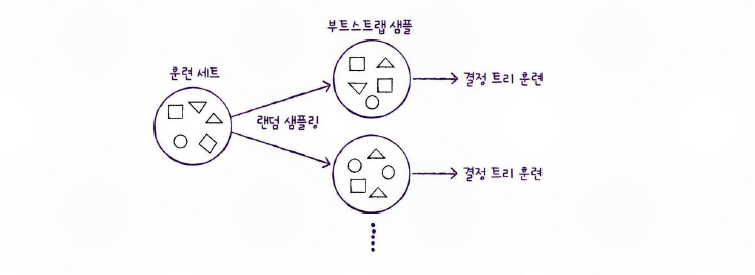
 - 각 노드를 분할 시 전체 특성 중 일부 특성을 무작위로 고름.
 - 랜덤하게 선택한 샘플과 특성을 사용 → 과대적합 방지 & 안정적인 성능

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [2]:
data = wine[['alcohol', 'sugar', 'pH']]
target = wine['class']
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42
)
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [3]:
# 교차 검증
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(
    rf, train_input, train_target, 
    return_train_score=True,    # 훈련 세트에 대한 점수도 함께 반환 → 과대적합 파악에 용이
    n_jobs=-1
)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


훈련 세트에 과대적합 되었음.

In [4]:
# 특성 중요도 계산
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


In [ ]:
rf = RandomForestClassifier(
    oob_score=True,     # OBB 샘플로 결정 트리 평가 (검증 세트 역할)
    n_jobs=-1, random_state=42
)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


OBB(Out of Bag) 샘플 : 부트스트랩 샘플에 포함되지 않고 남는 샘플. 이 샘플들을 이용하여 부트스트랩 샘플로 훈련한 결정 트리를 평가함.

교차 검증을 대신할 수 있어서 결과적으로 훈련 세트에 더 많은 샘플을 사용할 수 있음.

### 엑스트라 트리